In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv")

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df[['total_bill','tip','smoker','time']].head()

,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner


In [13]:
df.assign(tip_rate=df['tip']/df['total_bill']).head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [17]:
df[df['time']=='Dinner'].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df[(df['time']=='Dinner') & (df['tip']>5)].head()

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


In [29]:
df[(df['size']>=5)|(df['total_bill']>45)].head()

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6


In [34]:
frame = pd.DataFrame({'col1': ['A', 'B', np.NaN, 'C', 'D'],'col2': ['F', np.NaN, 'G', 'H', 'I']})

In [36]:
frame.head()

,col1,col2
0,A,F
1,B,NaN
2,NaN,G
3,C,H
4,D,I


In [47]:
frame[frame['col2'].isna()]

,col1,col2
1,B,NaN


In [48]:
frame[frame['col1'].notna()]

,col1,col2
0,A,F
1,B,NaN
3,C,H
4,D,I


In [61]:
df.groupby(['sex','smoker']).count()

total_bill  tip  day  time  size
sex    smoker                                  
Female No              54   54   54    54    54
       Yes             33   33   33    33    33
Male   No              97   97   97    97    97
       Yes             60   60   60    60    60

In [72]:
df.groupby('day').agg({'tip':np.mean,'day':np.size})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


In [80]:
df.groupby(['smoker','day']).agg({'tip':[np.size,np.mean]})

tip          
             size      mean
smoker day                 
No     Fri    4.0  2.812500
       Sat   45.0  3.102889
       Sun   57.0  3.167895
       Thur  45.0  2.673778
Yes    Fri   15.0  2.714000
       Sat   42.0  2.875476
       Sun   19.0  3.516842
       Thur  17.0  3.030000

In [81]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],'value': np.random.randn(4)})

df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'],'value': np.random.randn(4)})


In [85]:
df1

,key,value
0,A,-0.522096
1,B,-0.180954
2,C,-0.041678
3,D,0.407953


In [86]:
df2

,key,value
0,B,0.518670
1,D,0.422319
2,D,-0.036391
3,E,1.328985


In [92]:
pd.merge(df1,df2,on='key')

,key,value_x,value_y
0,B,-0.180954,0.518670
1,D,0.407953,0.422319
2,D,0.407953,-0.036391


In [97]:
df1.merge(df2,on='key')

,key,value_x,value_y
0,B,-0.180954,0.518670
1,D,0.407953,0.422319
2,D,0.407953,-0.036391


In [101]:
pd.concat([df1,df2]).drop_duplicates()

,key,value
0,A,-0.522096
1,B,-0.180954
2,C,-0.041678
3,D,0.407953
0,B,0.518670
1,D,0.422319
2,D,-0.036391
3,E,1.328985


In [121]:
df.loc[df['tip']<2,'tip']*=2

In [122]:
df[df['tip']<2]

,total_bill,tip,sex,smoker,day,time,size


In [127]:
df.loc[df['tip']>2]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
237,32.83,2.34,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,3.50,Male,No,Sat,Dinner,2


In [158]:
df[df['sex'].str.contains('m',regex=True,case=False)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,3.50,Male,No,Sat,Dinner,2


In [166]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [167]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,3.50,Male,No,Sat,Dinner,2


In [178]:
df[df.assign(a=(df['tip']/df['total_bill'])*100)['a']>10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
236,12.60,2.00,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,3.50,Male,No,Sat,Dinner,2


In [180]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


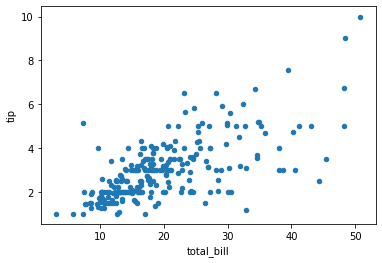

In [236]:

df.plot(kind='scatter',x='total_bill',y='tip')


In [239]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [18]:
df.assign(a=df['tip']/df['total_bill']).groupby(['total_bill','tip','sex','smoker','day','time','size']).agg({'a':np.mean})

a
total_bill tip   sex    smoker day  time   size          
3.07       1.00  Female Yes    Sat  Dinner 1     0.325733
5.75       1.00  Female Yes    Fri  Dinner 2     0.173913
7.25       1.00  Female No     Sat  Dinner 1     0.137931
           5.15  Male   Yes    Sun  Dinner 2     0.710345
7.51       2.00  Male   No     Thur Lunch  2     0.266312
...                                                   ...
45.35      3.50  Male   Yes    Sun  Dinner 3     0.077178
48.17      5.00  Male   No     Sun  Dinner 6     0.103799
48.27      6.73  Male   No     Sat  Dinner 4     0.139424
48.33      9.00  Male   No     Sat  Dinner 4     0.186220
50.81      10.00 Male   Yes    Sat  Dinner 3     0.196812

[243 rows x 1 columns]

In [15]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
t=pd.read_csv('https://raw.githubusercontent.com/okfn/dataportals.org/master/data/portals.csv')

In [21]:
t.columns

Index(['name', 'title', 'url', 'author', 'publisher', 'issued',
       'publisher_classification', 'description', 'tags', 'license_id',
       'license_url', 'place', 'location', 'country', 'language', 'status',
       'metadatacreated', 'generator', 'api_endpoint', 'api_type',
       'full_metadata_download'],
      dtype='object')

In [47]:
t.size

12432

In [71]:
t.loc[list(range(0,10)),'description'].str.contains('C')

0     True
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
9      NaN
Name: description, dtype: object

In [95]:
t[t['title'].str.contains('USA',case=False,na=False)]

,name,title,url,author,publisher,issued,publisher_classification,description,tags,license_id,...,place,location,country,language,status,metadatacreated,generator,api_endpoint,api_type,full_metadata_download
506,usa-spending,USASpending.gov,http://usaspending.gov/,US Government,US Government,NaN,NaN,The Federal Funding Accountability and Transpa...,finance unitedstates,notspecified,...,USA,"39.7837304,-100.4458825",US,en,active,2012-05-20T17:01:34.024Z,NaN,NaN,NaN,NaN


In [96]:
x=pd.read_csv("https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Fdownload&filename=home-countries-list.csv")

In [97]:
x.head()

,country,code,TotalDataset,OpenLicenses%,OpenLicensesNumber,MachineReadable%,MachineReadableNumber,Availability%,AvailabilityNumber,MetadataCompleteness%,MetadataCompletenessNumber
0,Austria,AT,2377,80,8435,28,1079,72,1959,69,1774
1,Belgium,BE,3742,2,96,59,2223,38,2066,36,1854
2,Bulgaria,BG,103,11,96,93,96,84,87,59,61
3,Croatia,HR,9,0,0,100,9,33,3,69,6
4,Czech Republic,CZ,44,0,0,65,28,17,1,22,8


In [98]:
x.columns

Index(['country', 'code', 'TotalDataset', 'OpenLicenses%',
       'OpenLicensesNumber', 'MachineReadable%', 'MachineReadableNumber',
       'Availability%', 'AvailabilityNumber', 'MetadataCompleteness%',
       'MetadataCompletenessNumber'],
      dtype='object')

In [102]:
y=pd.read_csv('https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Fdownload&filename=country_cat%2FGB.csv')

In [103]:
y.head()

,catid,url,Catalogue name,Number of datasets,Number of distributions,Distribution size(MB),Unique publishers,Open licences(%),Availability(%),Machine readable(%),Metadata completeness(%)
0,373,http://data.gov.uk/,datagovuk,20541,89887,180931,1033,98,64,53,49
1,410,http://data.bris.ac.uk/data/,databrisacuk,979,22869,314027,0,0,60,4,38
2,412,http://data.london.gov.uk,datalondongovuk,609,1618,11721,58,88,16,86,75
3,435,http://data.glasgow.gov.uk/,dataglasgowgovuk,374,1882,952,54,75,99,91,75
4,600,http://www.opendatanottingham.org.uk,opendatanottingham-org-uk,74,23,5,7,0,100,1,50


In [104]:
y.loc[4]

catid                                                        600
url                         http://www.opendatanottingham.org.uk
Catalogue name                         opendatanottingham-org-uk
Number of datasets                                            74
Number of distributions                                       23
Distribution size(MB)                                          5
Unique publishers                                              7
Open licences(%)                                               0
Availability(%)                                              100
Machine readable(%)                                            1
Metadata completeness(%)                                      50
Name: 4, dtype: object